In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Always a misleading import name, regardless of using Opencv version 3.x, 4.x, ... 
print(cv2.__version__)  # installed with conda -c conda-forge python

3.4.7


Text(0, 0.5, 'y [px]')

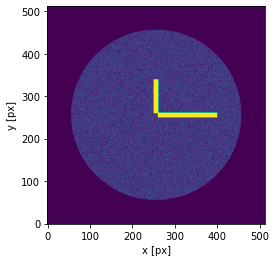

In [2]:
# Make a disk-shape object with a disk-shape mask with some random data
imsize = (512, 512)
xc, yc, radius = (256, 256, 200)  # we'll put circular object centered at pixel (256, 256)
random_arr = np.random.rand(*imsize)
y,x = np.ogrid[0:imsize[1], 0:imsize[0]]
mask = (x-xc)**2 + (y-yc)**2 > radius**2   
random_arr[mask] = 0
random_arr[260:340, 250:262] = 3
random_arr[250:262, 260:400] = 3

plt.figure()
plt.imshow(random_arr, origin='lower')
plt.xlabel('x [px]')
plt.ylabel('y [px]')

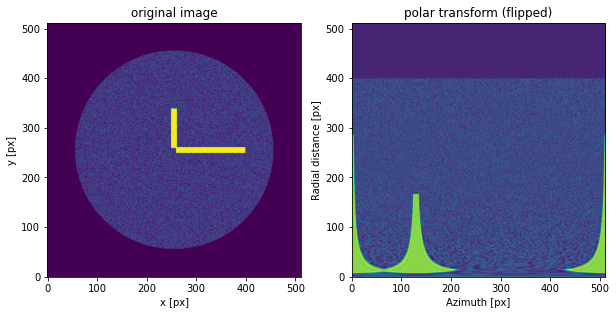

In [3]:
# Input parameters for the pre-baked polar transform of OpenCV (cv2.linearPolar())
center = (xc, yc)  # Center of the map (e.g. center of the sun, center of a sunspot, ...)
maxRadius = 256    # max radial distance where to interpolate. 
cv_interp_flags = cv2.INTER_LANCZOS4 + cv2.WARP_FILL_OUTLIERS
# Get the transform. This example interpolates with Lanczos and fills outliers with zeros
# See transformation flags at https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html 
pol_arr = cv2.linearPolar(random_arr, center, maxRadius, cv_interp_flags)

# The output has the radial axis on the x-axis, and angular axis on the y-axis. If can feel more natual to flip. 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axs[0].imshow(random_arr, origin='lower')
axs[0].set_xlabel('x [px]')
axs[0].set_ylabel('y [px]')
axs[0].set_title('original image')

# flipped polar map (transpose), with radial axis on the y-axis
axs[1].imshow(pol_arr.T, origin='lower')  
axs[1].set_xlabel('Azimuth [px]')
axs[1].set_ylabel('Radial distance [px]')
_ = axs[1].set_title('polar transform (flipped)')